In [1]:
import soundfile as sf
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
#function to grab and record stats
def getStats(fileName):
    #grab file and take raw data/sr out
    rawFile = sf.SoundFile(fileName)
    rawData = rawFile.read()
    samp = rawFile.samplerate
    #use librosa get waveform stats
    stft = np.abs(librosa.stft(rawData))
    mfccs = np.mean(librosa.feature.mfcc(y=rawData,sr=samp, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=samp).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=rawData, sr=samp).T,axis=0)
    #close file and return array of stats
    rawFile.close()
    return np.hstack((mfccs,chroma,mel))

In [3]:
features = []
emotions = []
for actor in os.listdir('Actors'):
    for fileName in os.listdir('Actors/' + actor):
        fullPath = str(Path.cwd()) + '/Actors/' + actor + '/' + fileName
        emotion = fileName[6:8]
        if emotion in ['02','03','06','07']:
            features.append(getStats(fullPath))
            emotions.append(emotion)

In [20]:
#TODO
#
#Work out best parameters for MLP and Logistic model (maybe map it out)
#
#Cross-Validation
#
#More graphs
#
#Learn what librosa stats are doing so we can better work through data

In [18]:
def trainMLPModel(train_features,train_emotions):
    model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
    model.fit(train_features,train_emotions)
    return model

In [38]:
def trainLogisticModel(train_features,train_emotions):
    model = LogisticRegression(tol= 1e-2,max_iter=50000)
    model.fit(train_features, train_emotions)
    return model

In [39]:
def testModel(model, test_features, test_emotions):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(y_true= test_emotions, y_pred= predictions)
    display = ConfusionMatrixDisplay.from_predictions(test_emotions,predictions,display_labels=['02','03','06','07'])
    plt.show()
    return accuracy

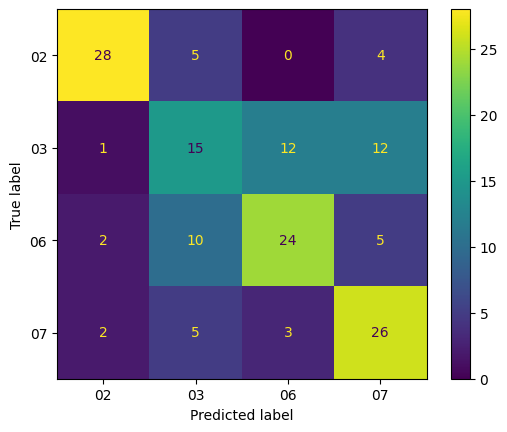

0.6038961038961039


In [40]:
train_features,test_features,train_emotions,test_emotions = train_test_split(features, emotions, test_size=0.2, random_state=1)
print(testModel(trainLogisticModel(train_features,train_emotions),test_features, test_emotions))